In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import xgboost as xgb


In [4]:
data = pd.read_csv('cleanedData.csv')
print(data.shape)
data.head()

(2930, 76)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,HasFence
0,1,526301100,20,RL,141.0,31770,1,IR1,Lvl,AllPub,...,0,0,NoFence,0,5,2010,WD,Normal,215000,0
1,2,526350040,20,RH,80.0,11622,1,Reg,Lvl,AllPub,...,0,120,MnPrv,0,6,2010,WD,Normal,105000,1
2,3,526351010,20,RL,81.0,14267,1,IR1,Lvl,AllPub,...,0,0,NoFence,12500,6,2010,WD,Normal,172000,0
3,4,526353030,20,RL,93.0,11160,1,Reg,Lvl,AllPub,...,0,0,NoFence,0,4,2010,WD,Normal,244000,0
4,5,527105010,60,RL,74.0,13830,1,IR1,Lvl,AllPub,...,0,0,MnPrv,0,3,2010,WD,Normal,189900,1


In [5]:
X, y = data.drop("SalePrice", axis = 'columns'), data['SalePrice']
X.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,HasFence
0,1,526301100,20,RL,141.0,31770,1,IR1,Lvl,AllPub,...,0,0,0,NoFence,0,5,2010,WD,Normal,0
1,2,526350040,20,RH,80.0,11622,1,Reg,Lvl,AllPub,...,0,0,120,MnPrv,0,6,2010,WD,Normal,1
2,3,526351010,20,RL,81.0,14267,1,IR1,Lvl,AllPub,...,0,0,0,NoFence,12500,6,2010,WD,Normal,0
3,4,526353030,20,RL,93.0,11160,1,Reg,Lvl,AllPub,...,0,0,0,NoFence,0,4,2010,WD,Normal,0
4,5,527105010,60,RL,74.0,13830,1,IR1,Lvl,AllPub,...,0,0,0,MnPrv,0,3,2010,WD,Normal,1


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

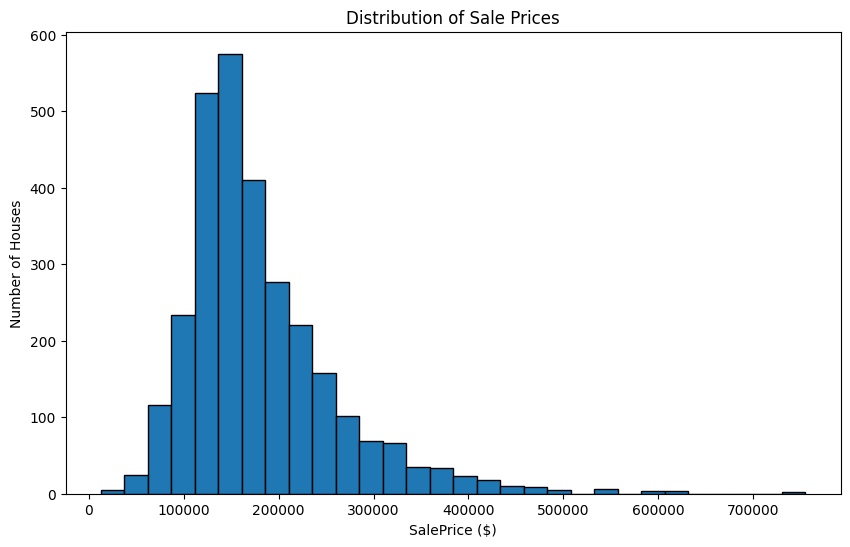

In [8]:
plt.figure(figsize=(10,6))
plt.hist(data['SalePrice'], bins=30, edgecolor='black')
plt.title("Distribution of Sale Prices")
plt.xlabel("SalePrice ($)")
plt.ylabel("Number of Houses")
plt.show()

In [9]:
data['SalePrice'].value_counts().sort_index()

SalePrice
12789     1
13100     1
34900     1
35000     1
35311     1
         ..
611657    1
615000    1
625000    1
745000    1
755000    1
Name: count, Length: 1032, dtype: int64

ideal ar fi sa avem pana in 100 de instante in fiecare bin (30 bins cu numar aproape egal de instante)
sau mai mare/mic decat media?
sau poate trebuie dupa distributia in 30 de bins facuta in graficul de deasupra?

In [10]:
total = 0 
bins = 0
lims = [] #limita superioara = valori pana la ....
frequency = [] #numarul de valori pana la limita superioara corespunzatoare
sorted_values = data['SalePrice'].value_counts().sort_index()
for i, j in sorted_values.items():
    if total + j > 100:
        bins += 1 
        lims.append(str(i))
        frequency.append(total)
        total = j
    else:
        total = total + j
print(bins)
print(lims)
print(frequency)

30
['81500', '95000', '106000', '113000', '119000', '124000', '128000', '131000', '135000', '138000', '141500', '145000', '148800', '154000', '159000', '164990', '170440', '176000', '181000', '187500', '194500', '204000', '214000', '225000', '237000', '252678', '272000', '300000', '338931', '438780']
[100, 98, 99, 98, 90, 98, 99, 97, 76, 92, 100, 77, 99, 99, 100, 100, 100, 89, 96, 98, 100, 97, 98, 96, 98, 100, 100, 98, 100, 100]


<BarContainer object of 30 artists>

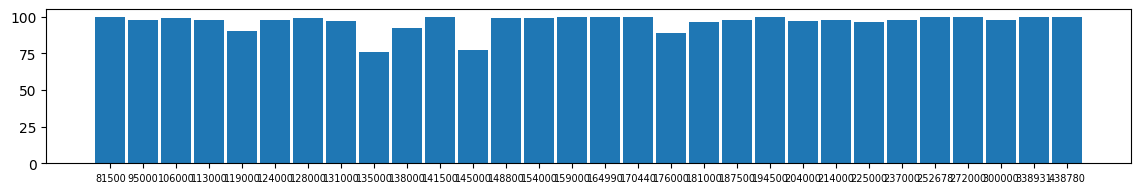

In [11]:
plt.figure(figsize=(14, 2))
plt.xticks(fontsize=7)
display(plt.bar(np.array(lims), np.array(frequency), width = 0.9))

In [12]:
lims_numeric = sorted([int(x) for x in lims])
lims_numeric.append(int(data['SalePrice'].max() + 1))
y_classEq = pd.cut(data['SalePrice'], bins=[0]+lims_numeric, labels=False, include_lowest=True)
y_classEq = y_classEq.astype(int)


In [13]:
X_numeric = pd.get_dummies(X) 
X_trainEq10, X_testEq10, y_trainEq10, y_testEq10 = train_test_split(
    X_numeric, y_classEq, test_size=0.1, random_state=42
)

In [14]:
modelEq10 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)

modelEq10.fit(X_trainEq10, y_trainEq10)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [15]:
y_predEq10 = modelEq10.predict(X_testEq10)
y_probEq10 = modelEq10.predict_proba(X_testEq10)

print("\n Accuracy:", accuracy_score(y_testEq10, y_predEq10))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testEq10, y_predEq10, average='micro'))

print("\n Precision:", sklearn.metrics.precision_score(y_testEq10, y_predEq10, average='micro'))

print("\n Recall", sklearn.metrics.recall_score(y_testEq10, y_predEq10, average='micro'))

print("\n Predicted class labels:", y_predEq10[:5])
print(" Actual class labels   :", y_testEq10[:5])



 Accuracy: 0.23890784982935154

 f1 score:  0.23890784982935154

 Precision: 0.23890784982935154

 Recall 0.23890784982935154

 Predicted class labels: [ 8  4 21  1  4]
 Actual class labels   : 1357    15
2367     4
2822    21
2126     5
1544     6
Name: SalePrice, dtype: int64


In [16]:
X_trainEq20, X_testEq20, y_trainEq20, y_testEq20 = train_test_split(
    X_numeric, y_classEq, test_size=0.2, random_state=42
)


In [17]:
modelEq20 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)

modelEq20.fit(X_trainEq20, y_trainEq20)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [18]:
y_predEq20 = modelEq20.predict(X_testEq20)
y_probEq20 = modelEq20.predict_proba(X_testEq20)

print("\n Accuracy:", accuracy_score(y_testEq20, y_predEq20))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testEq20, y_predEq20, average='micro'))

print("\n Accuracy:", sklearn.metrics.precision_score(y_testEq20, y_predEq20, average='micro'))

print("\n Recall", sklearn.metrics.recall_score(y_testEq20, y_predEq20, average='micro'))

print("\n Predicted class labels:", y_predEq20[:5])
print(" Actual class labels   :", y_testEq20[:5])



 Accuracy: 0.2098976109215017

 f1 score:  0.2098976109215017

 Accuracy: 0.2098976109215017

 Recall 0.2098976109215017

 Predicted class labels: [ 6  4 23  1  2]
 Actual class labels   : 1357    15
2367     4
2822    21
2126     5
1544     6
Name: SalePrice, dtype: int64


<Figure size 1000x800 with 0 Axes>

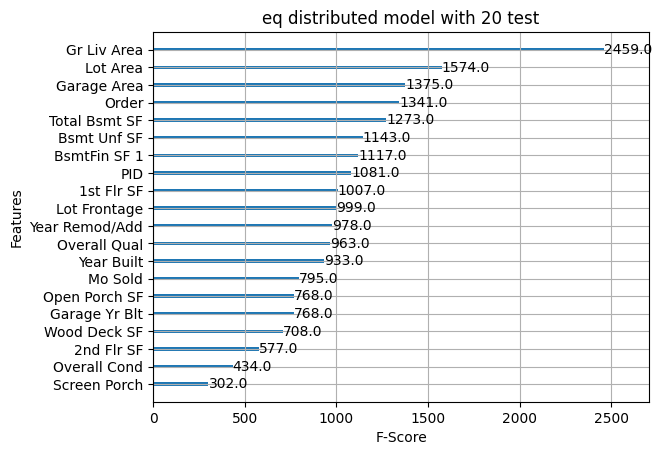

In [19]:
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(
    modelEq20,
    importance_type='weight',
    xlabel='F-Score',
    max_num_features=20 
)
plt.title("eq distributed model with 20 test")
plt.show()

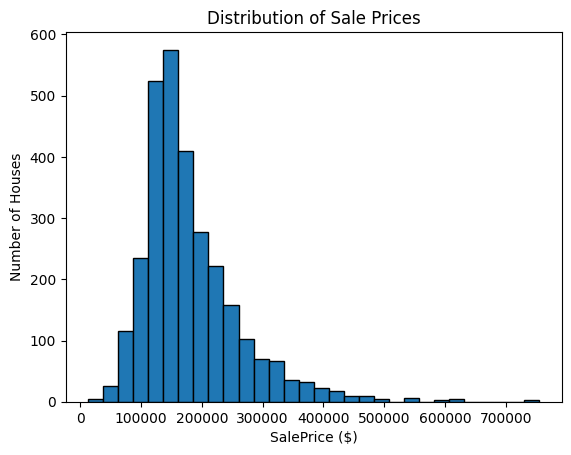

[ 12789.          37529.36666667  62269.73333333  87010.1
 111750.46666667 136490.83333333 161231.2        185971.56666667
 210711.93333333 235452.3        260192.66666667 284933.03333333
 309673.4        334413.76666667 359154.13333333 383894.5
 408634.86666667 433375.23333333 458115.6        482855.96666667
 507596.33333333 532336.7        557077.06666667 581817.43333333
 606557.8        631298.16666667 656038.53333333 680778.9
 705519.26666667 730259.63333333 755000.        ]


In [20]:
counts, classes, patches = plt.hist(data['SalePrice'], bins=30, edgecolor='black')

plt.title("Distribution of Sale Prices")
plt.xlabel("SalePrice ($)")
plt.ylabel("Number of Houses")
plt.show()
print(classes)

In [21]:
# not equally distributed = NE - intervale egale
y_classNE = pd.cut(data['SalePrice'], bins=[0]+classes, labels=False, include_lowest=True)
y_classNE = y_classNE.astype(int)

In [22]:
X_trainNE10, X_testNE10, y_trainNE10, y_testNE10 = train_test_split(
    X_numeric, y_classNE, test_size=0.1, random_state=42
)

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_trainNE10 = le.fit_transform(y_trainNE10)
y_testNE10 = le.transform(y_testNE10)

In [24]:
modelNE10 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)

modelNE10.fit(X_trainNE10, y_trainNE10)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [25]:
y_predNE10 = modelNE10.predict(X_testNE10)
y_probNE10 = modelNE10.predict_proba(X_testNE10)

print("\n Accuracy:", accuracy_score(y_testNE10, y_predNE10))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testNE10, y_predNE10, average='weighted'))

print("\n Precision:", sklearn.metrics.precision_score(y_testNE10, y_predNE10, average='weighted', zero_division=0))

print("\n Recall", sklearn.metrics.recall_score(y_testNE10, y_predNE10, average='weighted', zero_division=0))

print("\n Predicted class labels:", y_predNE10[:5])
print(" Actual class labels   :", y_testNE10[:5])



 Accuracy: 0.49146757679180886

 f1 score:  0.4825041004144603

 Precision: 0.4811894273463453

 Recall 0.49146757679180886

 Predicted class labels: [4 4 8 4 4]
 Actual class labels   : [5 4 7 4 4]


In [26]:
X_trainNE20, X_testNE20, y_trainNE20, y_testNE20 = train_test_split(
    X_numeric, y_classNE, test_size=0.2, random_state=42
)

In [27]:
le = LabelEncoder()
y_trainNE20 = le.fit_transform(y_trainNE20)
y_testNE20 = le.transform(y_testNE20)

In [28]:
modelNE20 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)

modelNE20.fit(X_trainNE20, y_trainNE20)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [29]:
y_predNE20 = modelNE20.predict(X_testNE20)
y_probNE20 = modelNE20.predict_proba(X_testNE20)

print("\n Accuracy:", accuracy_score(y_testNE20, y_predNE20))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testNE20, y_predNE20, average='weighted'))

print("\n Precision:", sklearn.metrics.precision_score(y_testNE20, y_predNE20, average='weighted', zero_division=0))

print("\n Recall", sklearn.metrics.recall_score(y_testNE20, y_predNE20, average='weighted', zero_division=0))

print("\n Predicted class labels:", y_predNE20[:5])
print(" Actual class labels   :", y_testNE20[:5])


 Accuracy: 0.47952218430034127

 f1 score:  0.47039518407340236

 Precision: 0.4676280855143609

 Recall 0.47952218430034127

 Predicted class labels: [5 4 7 5 4]
 Actual class labels   : [5 4 7 4 4]


In [30]:
counts = y_classNE.value_counts()

# Keep only classes with at least 2 samples
valid_classes = counts[counts >= 2].index
mask = y_classNE.isin(valid_classes)

X_numericn = X_numeric[mask]
y_classNEn = y_classNE[mask]

In [31]:
X_trainS10, X_testS10, y_trainS10, y_testS10 = train_test_split(
    X_numericn, y_classNEn, test_size=0.1, stratify=y_classNEn, random_state=42
)

In [32]:
y_trainS10 = le.fit_transform(y_trainS10)
y_testS10 = le.transform(y_testS10)

In [33]:
modelS10 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)

modelS10.fit(X_trainS10, y_trainS10)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [34]:
y_predS10 = modelS10.predict(X_testS10)
y_probS10 = modelS10.predict_proba(X_testS10)

print("\n Accuracy:", accuracy_score(y_testS10, y_predS10))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testS10, y_predS10, average='weighted'))

print("\n Precision:", sklearn.metrics.precision_score(y_testS10, y_predS10, average='weighted', zero_division=0))

print("\n Recall", sklearn.metrics.recall_score(y_testS10, y_predS10, average='weighted', zero_division=0))

print("\n Predicted class labels:", y_predS10[:5])
print(" Actual class labels   :", y_testS10[:5])


 Accuracy: 0.4778156996587031

 f1 score:  0.46821266925837557

 Precision: 0.4785192287824504

 Recall 0.4778156996587031

 Predicted class labels: [6 4 5 4 4]
 Actual class labels   : [8 4 6 4 5]


<Figure size 3000x2000 with 0 Axes>

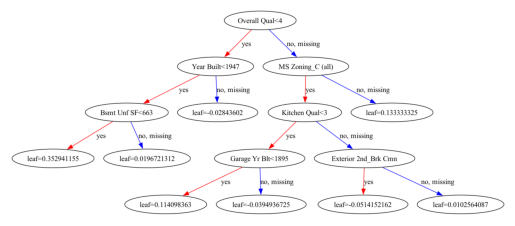

In [35]:
import graphviz
from xgboost import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20))  
plot_tree(modelNE10, tree_idx=1)
plt.show()

<Figure size 1000x800 with 0 Axes>

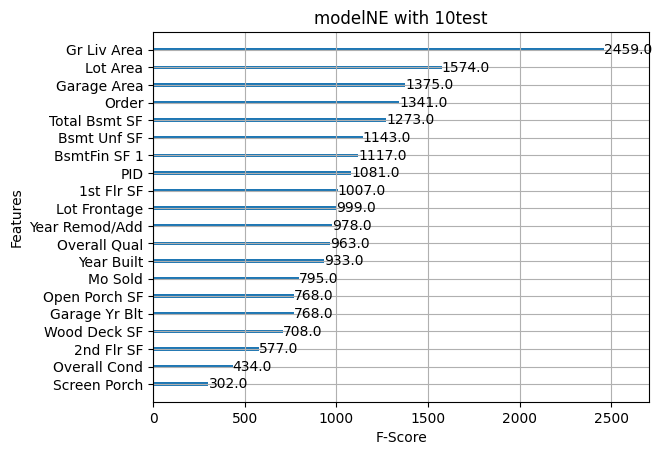

In [36]:
from xgboost import plot_importance
plt.figure(figsize=(10, 8))
plot_importance(
    modelEq20,
    importance_type='weight',
    xlabel='F-Score',
    max_num_features=20 
)
plt.title("modelNE with 10test")
plt.show()

<Figure size 3000x2000 with 0 Axes>

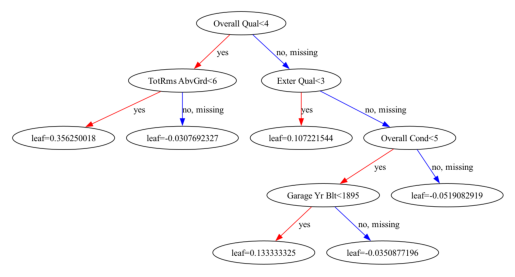

In [37]:
plt.figure(figsize=(30, 20))  
plot_tree(modelS10, tree_idx=1) 
plt.show()

<Figure size 1000x800 with 0 Axes>

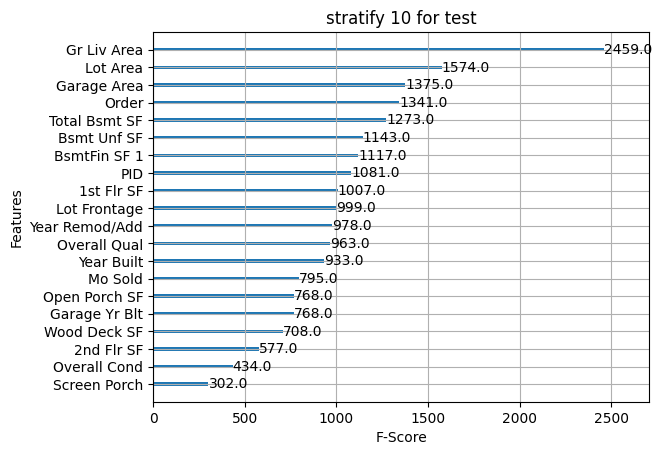

In [38]:
plt.figure(figsize=(10, 8))
plot_importance(
    modelEq20,
    importance_type='weight',
    xlabel='F-Score',
    max_num_features=20 
)
plt.title("stratify 10 for test")
plt.show()

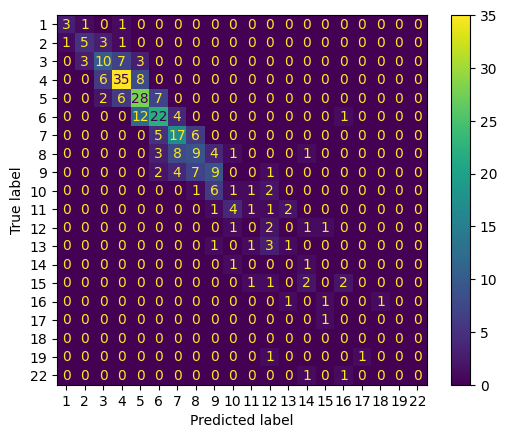

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
   y_testNE10, y_predNE10) #not equelly distributed, equal intervals

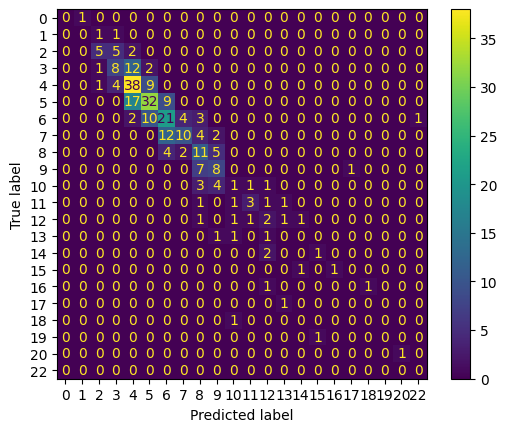

In [40]:
ConfusionMatrixDisplay.from_predictions(
   y_testS10, y_predS10) #stratify

In [41]:
from sklearn.model_selection import KFold
modelK = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)


In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold5 = KFold(n_splits=5, shuffle=True, random_state=42)
y_encoded = le.fit_transform(y_classNE)
score5 = cross_val_score(modelK, X_numeric, y_encoded, cv=kfold5)
print("5Fold  Accuracy :", score5)
print("Mean:", np.mean(score5))



5Fold  Accuracy : [0.47952218 0.49146758 0.48976109 0.49658703 0.45733788]
Mean: 0.4829351535836177


In [43]:
kfold10 = KFold(n_splits=10, shuffle=True, random_state=42)
score10 = cross_val_score(modelK, X_numeric, y_encoded, cv=kfold10)
print("10Fold  Accuracy :", score10)
print("Mean:", np.mean(score10))

10Fold  Accuracy : [0.49146758 0.47440273 0.47098976 0.48464164 0.48805461 0.5221843
 0.50170648 0.49488055 0.45392491 0.46075085]
Mean: 0.48430034129692834


dureaza destul de mult

In [44]:
y_log = np.log1p(y) 
y_classL, bin_edgesL = pd.qcut(y_log, q=30, labels=False, retbins=True)
print(bin_edgesL)

[ 9.45641889 11.3045581  11.45745812 11.56600065 11.63071739 11.68688718
 11.72804491 11.75979336 11.78296024 11.81303746 11.84223641 11.8706069
 11.89478753 11.91839724 11.9575322  11.98293534 12.02575508 12.06105265
 12.09255071 12.1267913  12.15478461 12.20357453 12.25006241 12.29579126
 12.34583894 12.4049276  12.46844076 12.54697323 12.66149419 12.82782836
 13.53447435]


In [45]:
X_trainL10, X_testL10, y_trainL10, y_testL10 = train_test_split(
    X_numeric, y_classL, test_size=0.1, random_state=42)

In [46]:
modelL10 = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_classL)),
    learning_rate=0.1,
    max_depth=4,
    n_estimators=100,
    random_state=42
)

modelL10.fit(X_trainL10, y_trainL10)


,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [47]:
y_predL10 = modelL10.predict(X_testL10)
y_probL10 = modelL10.predict_proba(X_testL10)

print("\n Accuracy:", accuracy_score(y_testL10, y_predL10))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testL10, y_predL10, average='micro'))

print("\n Precision:", sklearn.metrics.precision_score(y_testL10, y_predL10, average='micro'))

print("\n Recall", sklearn.metrics.recall_score(y_testL10, y_predL10, average='micro'))

print("\n Predicted class labels:", y_predL10[:5])
print(" Actual class labels   :", y_testL10[:5])


 Accuracy: 0.22866894197952217

 f1 score:  0.22866894197952217

 Precision: 0.22866894197952217

 Recall 0.22866894197952217

 Predicted class labels: [13  4 20  1  4]
 Actual class labels   : 1357    15
2367     4
2822    20
2126     5
1544     6
Name: SalePrice, dtype: int64


In [48]:
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

X_trainL, X_testL, y_trainL, y_testL = train_test_split(
    X_numeric, y_encoded, test_size=0.1, random_state=42)

In [49]:
from lightgbm import LGBMClassifier
modelL = LGBMClassifier(
    objective='multiclass',
    num_class=len(np.unique(y_encoded)),
    learning_rate=0.01,
    n_estimators=200,
    max_depth=6,
    num_leaves=31,
    min_data_in_leaf=20,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=1,
    random_state=42
)

modelL.fit(X_trainL, y_trainL)

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,6
,learning_rate,0.01
,n_estimators,200
,subsample_for_bin,200000
,objective,'multiclass'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [50]:
y_predL = modelL.predict(X_testL)
y_probL = modelL.predict_proba(X_testL)

print("\n Accuracy:", accuracy_score(y_testL, y_predL))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testL, y_predL, average='weighted'))

print("\n Precision:", sklearn.metrics.precision_score(y_testL, y_predL, average='weighted', zero_division=0))

print("\n Recall", sklearn.metrics.recall_score(y_testL, y_predL, average='weighted', zero_division=0))

print("\n Predicted class labels:", y_predL[:5])
print(" Actual class labels   :", y_testL[:5])

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20

 Accuracy: 0.5085324232081911

 f1 score:  0.498670278418

<Figure size 3000x2000 with 0 Axes>

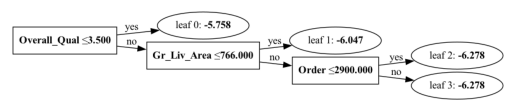

In [51]:
from lightgbm import plot_tree
plt.figure(figsize=(30, 20))
plot_tree(modelL.booster_)
plt.show()

<Figure size 1200x800 with 0 Axes>

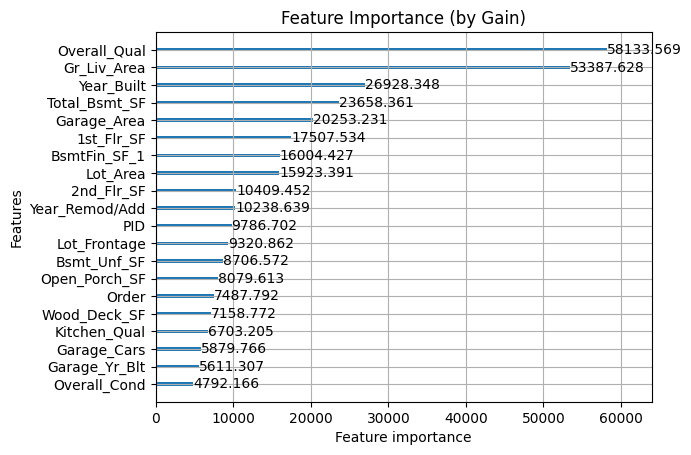

In [52]:
from lightgbm import plot_importance
modelL.booster_.feature_importance()
modelL.booster_.feature_name()
plt.figure(figsize=(12, 8))
plot_importance(
    modelL.booster_, 
    importance_type='gain', 
    max_num_features=20, 
)
plt.title("Feature Importance (by Gain)")
plt.show()

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Electrical',
       'Functional', 'Garage Type', 'Garage Finish', 'Paved Drive', 'Fence',
       'Sale Type', 'Sale Condition'],
      dtype='object') 29

In [53]:
ndata = pd.read_csv('cleanedData.csv')
ndata = ndata.drop("Order", axis = 'columns')
ndata = ndata.drop("PID", axis = 'columns')

In [54]:
from scipy.stats.mstats import winsorize #scoatem 5% din ambele capete pentru outliers
ndata['GrLivArea_winsor'] = winsorize(ndata['Gr Liv Area'], limits=[0.05, 0.05])

In [55]:
ndata.select_dtypes(exclude='object').corr()['SalePrice'].sort_values(ascending=False)

SalePrice           1.000000
Overall Qual        0.799262
Gr Liv Area         0.706780
GrLivArea_winsor    0.702279
Exter Qual          0.697970
Bsmt Qual           0.697970
Kitchen Qual        0.672914
Garage Cars         0.647562
Garage Area         0.640138
Total Bsmt SF       0.632529
1st Flr SF          0.621676
Year Built          0.558426
Full Bath           0.545604
Year Remod/Add      0.532974
TotRms AbvGrd       0.495474
Fireplaces          0.481446
Heating QC          0.450325
BsmtFin SF 1        0.433147
Lot Frontage        0.353400
Wood Deck SF        0.327143
Open Porch SF       0.312951
Half Bath           0.285056
Garage Qual         0.277952
Bsmt Full Bath      0.275823
2nd Flr SF          0.269373
Lot Area            0.266549
Central Air         0.264506
Garage Cond         0.261805
Garage Yr Blt       0.253459
Bsmt Unf SF         0.183308
Bedroom AbvGr       0.143913
Screen Porch        0.112151
Street              0.059519
Mo Sold             0.035259
3Ssn Porch    

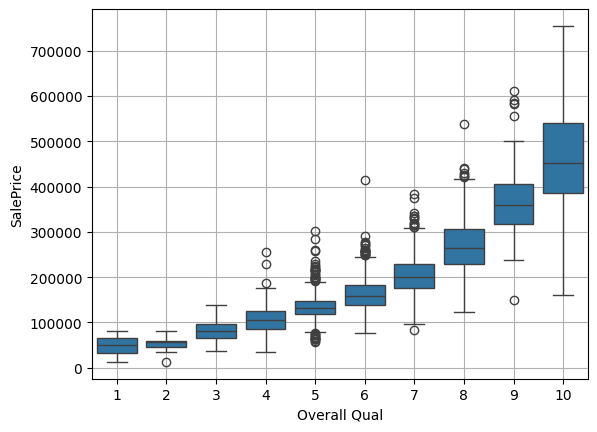

In [56]:
sns.boxplot(ndata, y='SalePrice', x='Overall Qual')
plt.grid()

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

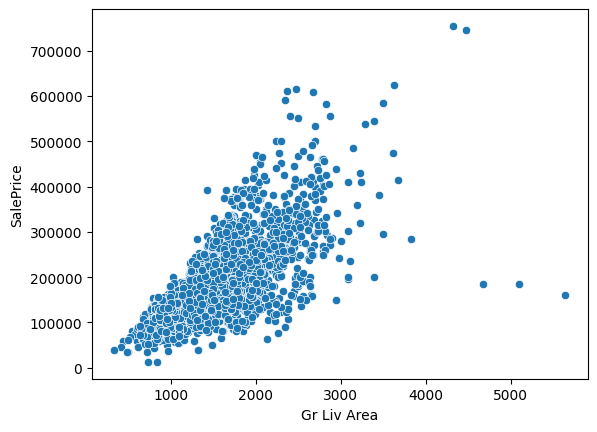

In [57]:
sns.scatterplot(ndata, y='SalePrice', x='Gr Liv Area')

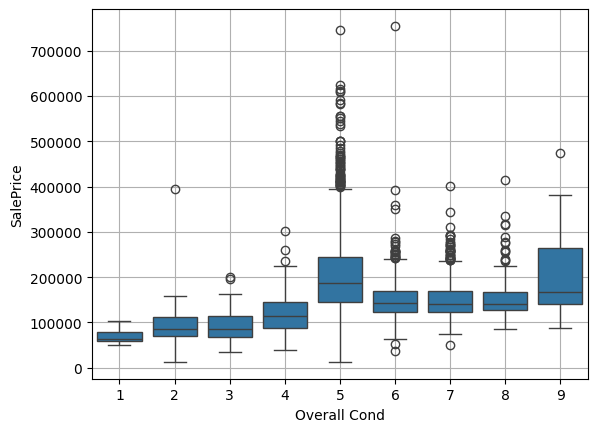

In [58]:
sns.boxplot(ndata, y='SalePrice', x='Overall Cond')
plt.grid()

In [59]:
outliers = pd.concat([
    ndata[(ndata['Overall Qual'] == 6) & (ndata['SalePrice'] > 400000)],
    ndata[(ndata['Overall Qual'] == 8) & (ndata['SalePrice'] > 500000)],
    ndata[(ndata['Overall Qual'] == 9) & (ndata['SalePrice'] < 200000)],
    ndata[(ndata['Gr Liv Area'] > 4100) & (ndata['SalePrice'] < 3e5)],
    ndata[(ndata['Overall Cond'] == 2) & (ndata['SalePrice'] > 3e5)],
    ndata[(ndata['Overall Cond'] == 6) & (ndata['SalePrice'] > 7e5)]
    ]).sort_index().drop_duplicates()

In [60]:
ndata = ndata.drop(outliers.index)
ndata.shape

(2922, 75)

In [61]:
avg_price_at_neighborhood = ndata.groupby('Neighborhood', as_index=False)['SalePrice'].mean().rename({'SalePrice' : 'avg_price_at_neighborhood'}, axis=1)
ndata = ndata.merge(avg_price_at_neighborhood, how='left', on='Neighborhood')
ndata = ndata.drop('Neighborhood', axis=1)
ndata

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,HasFence,GrLivArea_winsor,avg_price_at_neighborhood
0,20,RL,141.0,31770,1,IR1,Lvl,AllPub,Corner,Gtl,...,NoFence,0,5,2010,WD,Normal,215000,0,1656,145097.349887
1,20,RH,80.0,11622,1,Reg,Lvl,AllPub,Inside,Gtl,...,MnPrv,0,6,2010,WD,Normal,105000,1,896,145097.349887
2,20,RL,81.0,14267,1,IR1,Lvl,AllPub,Corner,Gtl,...,NoFence,12500,6,2010,WD,Normal,172000,0,1329,145097.349887
3,20,RL,93.0,11160,1,Reg,Lvl,AllPub,Corner,Gtl,...,NoFence,0,4,2010,WD,Normal,244000,0,2110,145097.349887
4,60,RL,74.0,13830,1,IR1,Lvl,AllPub,Inside,Gtl,...,MnPrv,0,3,2010,WD,Normal,189900,1,1629,190646.575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,80,RL,37.0,7937,1,IR1,Lvl,AllPub,CulDSac,Gtl,...,GdPrv,0,3,2006,WD,Normal,142500,1,1003,162226.631579
2918,20,RL,74.0,8885,1,IR1,Low,AllPub,Inside,Mod,...,MnPrv,0,6,2006,WD,Normal,131000,1,902,162226.631579
2919,85,RL,62.0,10441,1,Reg,Lvl,AllPub,Inside,Gtl,...,MnPrv,700,7,2006,WD,Normal,132000,1,970,162226.631579
2920,20,RL,77.0,10010,1,Reg,Lvl,AllPub,Inside,Mod,...,NoFence,0,4,2006,WD,Normal,170000,0,1389,162226.631579


In [62]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ordinal_features = [
    'Lot Shape',
    'Utilities',
    'Land Slope',
    'Exter Qual',
    'Exter Cond',
    'Heating QC',
    'Electrical',
    'Functional',
    'Paved Drive',
    'Bsmt Exposure',
       'BsmtFin Type 1', 
       'BsmtFin Type 2',
       'Garage Finish',
       'Fence'
]
nominal_features = [
    'MS Zoning',
    'Land Contour',
    'Lot Config',
    'Condition 1',
    'Condition 2',
    'Bldg Type',
    'House Style',
    'Heating',
    'Roof Style',
    'Roof Matl',
    'Exterior 1st',
    'Exterior 2nd',
    'Foundation',
    'Garage Type',
    'Sale Type', 'Sale Condition'
]

In [63]:
df_encoded = ndata.copy()

# Ordinal encoding
oe = OrdinalEncoder()
for col in ordinal_features:
  df_encoded[col] = oe.fit_transform(df_encoded[col].values.reshape(-1, 1))

df_encoded.sample(10)

# Nominal encoding
ohe = OneHotEncoder(drop="first", sparse_output=False)
encoded = ohe.fit_transform(df_encoded[nominal_features])

ohe_encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(nominal_features), index=df_encoded.index)

ndata = pd.concat([df_encoded.drop(columns=nominal_features), ohe_encoded_df], axis=1)

ndata.sample(5)

,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
2255,20,89.0,10991,1,0.0,0.0,0.0,8,5,2007,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2888,20,50.0,8049,1,0.0,0.0,0.0,7,5,1990,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12,60,63.0,8402,1,0.0,0.0,0.0,6,5,1998,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
978,85,50.0,7689,1,0.0,0.0,0.0,5,8,1972,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1626,20,160.0,18160,0,3.0,0.0,0.0,6,6,1964,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [64]:
obj_cols = ndata.select_dtypes(include='object').columns
print(obj_cols, obj_cols.size)

Index([], dtype='object') 0


In [65]:
from sklearn.preprocessing import MinMaxScaler

df_mm = ndata.copy()


# - MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the entire dataset
mm_scaled_data = min_max_scaler.fit_transform(df_mm)

# Convert back to DataFrame
df_mm = pd.DataFrame(mm_scaled_data, columns=df_mm.columns)

df_mm.sample(5)


ndata = df_mm

In [66]:
target = 'SalePrice'

# Compute correlation matrix
corr_matrix = ndata.corr(numeric_only=True)

# Extract correlation with the target variable
corr_with_sale_price_df = pd.DataFrame({
    'Correlation with Target': corr_matrix[target]
}).sort_values(by='Correlation with Target', ascending=False)

# Define threshold for low correlation features
low_corr_threshold = 0.2

# Identify features with low correlation
features_to_remove = corr_with_sale_price_df[
    abs(corr_with_sale_price_df['Correlation with Target']) < low_corr_threshold
].index.tolist()

print(f"Features to remove (|r| < {low_corr_threshold}): {len(features_to_remove)} features")

# --- Apply the feature removal ---
df_reduced = ndata.drop(columns=features_to_remove, errors='ignore')

print(f"\nOriginal shape: {ndata.shape}")
print(f"Reduced shape: {df_reduced.shape}")

# Optionally remove ID columns or irrelevant identifiers
if 'PID' in df_reduced.columns:
    df_reduced = df_reduced.drop(columns=['PID'])

print(f"\nShape after removing low-correlation + ID: {df_reduced.shape}")

# --- Analyze correlation groups ---
high_corr_features = corr_with_sale_price_df[
    (abs(corr_with_sale_price_df['Correlation with Target']) > 0.5) &
    (corr_with_sale_price_df.index != target)
].index.tolist()

moderate_corr_features = corr_with_sale_price_df[
    (abs(corr_with_sale_price_df['Correlation with Target']) >= 0.3) &
    (abs(corr_with_sale_price_df['Correlation with Target']) <= 0.5) &
    (corr_with_sale_price_df.index != target)
].index.tolist()

print(f"\nHigh correlation features (|r| > 0.5): {len(high_corr_features)} features")
print(f"Moderate correlation features (0.3 ≤ |r| ≤ 0.5): {len(moderate_corr_features)} features")
print(f"\nTop correlated features:\n{high_corr_features[:10]}")

Features to remove (|r| < 0.2): 119 features

Original shape: (2922, 170)
Reduced shape: (2922, 51)

Shape after removing low-correlation + ID: (2922, 51)

High correlation features (|r| > 0.5): 15 features
Moderate correlation features (0.3 ≤ |r| ≤ 0.5): 16 features

Top correlated features:
['Overall Qual', 'avg_price_at_neighborhood', 'Gr Liv Area', 'GrLivArea_winsor', 'Bsmt Qual', 'Exter Qual', 'Kitchen Qual', 'Total Bsmt SF', 'Garage Cars', 'Garage Area']


In [67]:
ndata.shape

(2922, 170)

In [68]:
ndata.to_csv("incercare.csv", index=False)

In [69]:
nX, ny = ndata.drop("SalePrice", axis = 'columns'), ndata['SalePrice']

In [182]:
nX.head()

,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0.000000,0.410959,0.142420,1.0,0.0,0.0,0.0,0.555556,0.500,0.637681,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.048246,1.0,1.0,0.0,0.0,0.444444,0.625,0.644928,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.205479,0.060609,1.0,0.0,0.0,0.0,0.555556,0.625,0.623188,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.246575,0.046087,1.0,1.0,0.0,0.0,0.666667,0.500,0.695652,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.235294,0.181507,0.058566,1.0,0.0,0.0,0.0,0.444444,0.500,0.905797,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [70]:
y_classesI = pd.cut(
    ny,
    bins=3, 
    labels=False, 
    include_lowest=True 
)
print(y_classesI.head())

0    0
1    0
2    0
3    0
4    0
Name: SalePrice, dtype: int64


In [71]:
y_encodedI = le.fit_transform(y_classesI.dropna())

In [74]:
X_trainI10, X_testI10, y_trainI10, y_testI10 = train_test_split(
    nX, y_encodedI, test_size=0.1, random_state=42
)

In [75]:
modelI10 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.04,
    objective='multi:softmax'
)

modelI10.fit(X_trainI10, y_trainI10)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [76]:
y_predI10 = modelI10.predict(X_testI10)
y_probI10 = modelI10.predict_proba(X_testI10)

print("\n Accuracy:", accuracy_score(y_testI10, y_predI10))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testI10, y_predI10, average='weighted'))

print("\n Precision:", sklearn.metrics.precision_score(y_testI10, y_predI10, average='weighted', zero_division=0))

print("\n Recall", sklearn.metrics.recall_score(y_testI10, y_predI10, average='weighted', zero_division=0))

print("\n Predicted class labels:", y_predI10[:5])
print(" Actual class labels   :", y_testI10[:5])


 Accuracy: 0.9590443686006825

 f1 score:  0.9573749082806579

 Precision: 0.9557120206390584

 Recall 0.9590443686006825

 Predicted class labels: [0 0 0 0 0]
 Actual class labels   : [0 0 0 1 0]


<Figure size 3000x2000 with 0 Axes>

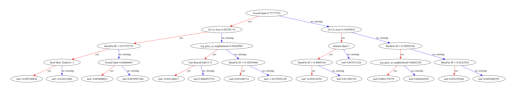

In [77]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20))  
plot_tree(modelI10, tree_idx=1)
plt.show()

In [78]:
data = data.drop("Order", axis = 'columns')
data = data.drop("PID", axis = 'columns')

In [79]:
data_numeric = pd.get_dummies(data) 

In [80]:
dX, dy = data_numeric.drop("SalePrice", axis = 'columns'), ndata['SalePrice']

In [81]:
y_classesD = pd.qcut(data['SalePrice'], q=3, labels=False, duplicates='drop')
mask = ~y_classesD.isna()
dX = dX[mask]
dy = y_classesD[mask]

In [82]:
X_trainD10, X_testD10, y_trainD10, y_testD10 = train_test_split(
    dX, dy, test_size=0.1, random_state=42
)

In [83]:
modelD10 = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)

modelD10.fit(X_trainD10, y_trainD10)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [84]:
y_predD10 = modelD10.predict(X_testD10)
y_probD10 = modelD10.predict_proba(X_testD10)

print("\n Accuracy:", accuracy_score(y_testD10, y_predD10))

print("\n f1 score: ", sklearn.metrics.f1_score(y_testD10, y_predD10, average='weighted'))

print("\n Precision:", sklearn.metrics.precision_score(y_testD10, y_predD10, average='weighted', zero_division=0))

print("\n Recall", sklearn.metrics.recall_score(y_testD10, y_predD10, average='weighted', zero_division=0))

print("\n Predicted class labels:", y_predD10[:5])
print(" Actual class labels   :", y_testD10[:5])


 Accuracy: 0.8668941979522184

 f1 score:  0.8680000110734637

 Precision: 0.869655987850966

 Recall 0.8668941979522184

 Predicted class labels: [0 0 1 0 0]
 Actual class labels   : 1357    1
2367    0
2822    2
2126    0
1544    0
Name: SalePrice, dtype: int64
